In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [98]:
dataset = pd.read_excel('World_Bank_Projects_downloaded_6_13_2022.xls')

In [99]:
#types of all columns in the dataframe
dataset.dtypes

id                           object
regionname                   object
countryname                  object
projectstatusdisplay         object
project_name                 object
pdo                          object
impagency                    object
cons_serv_reqd_ind           object
url                          object
boardapprovaldate            object
closingdate                  object
projectfinancialtype         object
curr_project_cost           float64
curr_ibrd_commitment          int64
curr_ida_commitment           int64
curr_total_commitment         int64
grantamt                      int64
borrower                     object
lendinginstr                 object
envassesmentcategorycode     object
esrc_ovrl_risk_rate          object
sector1                      object
sector2                      object
sector3                      object
theme1                       object
theme2                       object
dtype: object

In [100]:
#There are 21487 rows in the dataset

len(dataset)

21487

In [101]:
#trying to find out what values are there in the dataframe, types, formatting
dataset.head()

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P175792,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...,NaN,http://projects.worldbank.org/P175792/null?lan...,2022-03-25T00:00:00Z,...,410000,Republic of Malawi,Investment Project Financing,C,NaN,NaN,NaN,NaN,NaN,NaN
4,P177073,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &...",NaN,http://projects.worldbank.org/P177073/null?lan...,2022-03-25T00:00:00Z,...,0,Federated States of Micronesia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
dataset.describe()

,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt
count,2.134000e+04,2.148700e+04,2.148700e+04,2.148700e+04,2.148700e+04
mean,1.573027e+08,4.537050e+07,2.719748e+07,7.256798e+07,1.924198e+06
std,1.084423e+09,1.227862e+08,6.946621e+07,1.336311e+08,3.925397e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+07,0.000000e+00,0.000000e+00,5.000000e+06,0.000000e+00
50%,3.260000e+07,0.000000e+00,0.000000e+00,2.500000e+07,0.000000e+00
75%,1.013250e+08,3.150000e+07,2.200000e+07,8.400000e+07,0.000000e+00
max,9.300700e+10,3.750000e+09,1.375000e+09,3.750000e+09,5.330000e+09


In [103]:
#so we have Active, Closed, Pipeline and Dropped types, along with NaN
dataset.projectstatusdisplay.unique()


array(['Active', 'Closed', nan, 'Pipeline', 'Dropped'], dtype=object)

In [104]:
dataset.regionname.unique()

array(['Africa East', 'Middle East and North Africa',
       'East Asia and Pacific', 'Africa West',
       'Latin America and Caribbean', 'South Asia',
       'Europe and Central Asia', 'Other', 'Africa', nan], dtype=object)

In [105]:
#finding out NaN values for project status display: there are only three, so we may exclude them.
dataset[dataset['projectstatusdisplay'].isna()]

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
3301,P156335,East Asia and Pacific,Pacific Islands,NaN,PACIFIC RESILIENCE PROGRAM,The objective of the Program is to strengthen ...,NaN,NaN,http://projects.worldbank.org/P156335/null?lan...,2015-06-19T00:00:00Z,...,900000,NaN,Investment Project Financing,B,NaN,"Other Water Supply, Sanitation and Waste Manag...",Public Administration - Financial Sector,Other Transportation,Natural disaster management,Climate change
4752,P121213,Africa West,Republic of Liberia,NaN,DROPPED - LR: Road Asset Management Project - ...,The objective is to improve transport efficien...,NaN,NaN,http://projects.worldbank.org/P121213/liberia-...,2012-08-07T00:00:00Z,...,113000000,NaN,Specific Investment Loan,B,NaN,Rural and Inter-Urban Roads,NaN,NaN,Infrastructure services for private sector dev...,NaN
18367,P114115,Africa West,Republic of Guinea-Bissau,NaN,Education for All - Fast Track Initiative Program,The Project Development Objective is to improv...,NaN,NaN,http://projects.worldbank.org/P114115/educatio...,NaN,...,12000000,NaN,Specific Investment Loan,B,NaN,Primary Education,Secondary Education,NaN,Education for all,NaN


In [106]:
dataset[dataset['curr_project_cost'].isna()]['curr_project_cost'] = -dataset['curr_project_cost'].max()

C:\Users\krish\AppData\Local\Temp\ipykernel_19312\155088899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset['curr_project_cost'].isna()]['curr_project_cost'] = -dataset['curr_project_cost'].max()


In [107]:
#removing rows from the dataset where projectstatusdisplay is nan
dataset = dataset[dataset['projectstatusdisplay'].notna()]

In [108]:
#now, encoding pipeline, closed and active as 1, dropped as 0
#Assuming that closed project means that the projects have been completed...

dataset['projectstatus'] = dataset.apply(lambda row: 0 if row.projectstatusdisplay == 'Closed' or row.projectstatusdisplay == 'Dropped' else 1, axis = 1)

In [109]:
#encoding the categorical variables
label_encoder = preprocessing.LabelEncoder()
dataset['regioncode'] = label_encoder.fit_transform(dataset.regionname)
dataset['countrycode'] = label_encoder.fit_transform(dataset['countryname'])
dataset['countrycode'] = label_encoder.fit_transform(dataset['countryname'])
dataset['financecode'] = label_encoder.fit_transform(dataset['projectfinancialtype'])
dataset['borrowercode'] = label_encoder.fit_transform(dataset['borrower'])
dataset['lendinginstrcode'] = label_encoder.fit_transform(dataset['lendinginstr'])
dataset['envassesmentcategorycode'] = label_encoder.fit_transform(dataset['envassesmentcategorycode'])
dataset['esrc_ovrl_risk_rate'] = label_encoder.fit_transform(dataset['esrc_ovrl_risk_rate'])
dataset['sector1'] = label_encoder.fit_transform(dataset['sector1'])
dataset['sector2'] = label_encoder.fit_transform(dataset['sector2'])
dataset['sector3'] = label_encoder.fit_transform(dataset['sector3'])
dataset['theme1'] = label_encoder.fit_transform(dataset['theme1'])
dataset['theme2'] = label_encoder.fit_transform(dataset['theme2'])

In [110]:
# print(dataset.head())
print(dataset.envassesmentcategorycode.unique(),
dataset.esrc_ovrl_risk_rate.unique(),
dataset.sector1.unique(),
dataset.sector2.unique(),
dataset.sector3.unique(),
dataset.theme1.unique(),
dataset.theme2.unique()
,sep = '\n\n')

[8 2 1 0 6 4 7 3 5]

[4 3 1 0 2]

[159 145 146  76  94  83 148 111  93 116 149 144 139 130  82 125 158 118
 138  91 157 112  99 127  98 126  87  85  80  86  81 133 135 101  89 154
  77 128 117 134 110 140 102 141 100 113 151 115 156 109 131 103 104 152
 132  95 129 136 122 107 114 153 108 137  75 124 106 143 142  78 105 147
  33  26 123  36  16  41  54  29  88  35  48 120 119  96 155 150 121  79
  12  97  38  64  63  56  18  55  43  92  73  71  23   1   3  24   8  84
  67  27  21  30  60  13  14  70  19  66  31  34  57  40  68  62  53  22
  17  11   5  47  90  72  58  39   2  25   7   6  45  44  69  50  32  59
  74  37   4  10  20  28  51  65  61  42   9  52  46   0  15  49]

[102  99  29  33  72  42  58  69  92  40  36  76  91  68  52  26  31  75
  87  82 101  20  70  74  19  35  60  41  57  88 100  54  67  71  86  80
  44  30  49  97  59  45  73  53  24  43  95  96  55  77  56  18  37  51
  28  25  23  81  79  64  94  89  46  50  83  78  84  48  90  66  32  85
  47  21  65   2  38  6

In [111]:
dataset.isna().any()

id                          False
regionname                   True
countryname                  True
projectstatusdisplay        False
project_name                False
pdo                          True
impagency                    True
cons_serv_reqd_ind           True
url                         False
boardapprovaldate            True
closingdate                  True
projectfinancialtype         True
curr_project_cost            True
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
borrower                     True
lendinginstr                 True
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
projectstatus               False
regioncode                  False
countrycode                 False
financecode   

In [112]:
dataset.dtypes

id                           object
regionname                   object
countryname                  object
projectstatusdisplay         object
project_name                 object
pdo                          object
impagency                    object
cons_serv_reqd_ind           object
url                          object
boardapprovaldate            object
closingdate                  object
projectfinancialtype         object
curr_project_cost           float64
curr_ibrd_commitment          int64
curr_ida_commitment           int64
curr_total_commitment         int64
grantamt                      int64
borrower                     object
lendinginstr                 object
envassesmentcategorycode      int32
esrc_ovrl_risk_rate           int32
sector1                       int32
sector2                       int32
sector3                       int32
theme1                        int32
theme2                        int32
projectstatus                 int64
regioncode                  

In [113]:
#taking transformed and relevant columns, rejecting others
req_cols = ['project_name', 'pdo', 'impagency', 'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment', 'curr_total_commitment', 'grantamt', 'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2', 'sector3', 'theme1', 'theme2', 'regioncode', 'countrycode', 'financecode', 'borrowercode', 'lendinginstrcode', 'projectstatus']
dataset = pd.DataFrame(dataset, columns = req_cols)

In [114]:
dataset.isna().any()

project_name                False
pdo                          True
impagency                    True
curr_project_cost            True
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
regioncode                  False
countrycode                 False
financecode                 False
borrowercode                False
lendinginstrcode            False
projectstatus               False
dtype: bool

In [115]:
#since there still exist na values, fill them with empty strings (textual data)
dataset = dataset.fillna('')
dataset.isna().any()

project_name                False
pdo                         False
impagency                   False
curr_project_cost           False
curr_ibrd_commitment        False
curr_ida_commitment         False
curr_total_commitment       False
grantamt                    False
envassesmentcategorycode    False
esrc_ovrl_risk_rate         False
sector1                     False
sector2                     False
sector3                     False
theme1                      False
theme2                      False
regioncode                  False
countrycode                 False
financecode                 False
borrowercode                False
lendinginstrcode            False
projectstatus               False
dtype: bool

In [116]:
dataset.projectstatus.value_counts()

0    17425
1     4059
Name: projectstatus, dtype: int64

In [117]:
dataset = dataset.iloc[:, 4:]

In [118]:
# #visualisation
# g = sns.PairGrid(dataset.iloc[:, 4:])
# g.map(sns.scatterplot)

# #we can notice some multicollinearity going on here, but since the model will be a deep neural network, it may not pose much problems.

In [119]:
train, test = train_test_split(dataset, test_size = 0.15, shuffle = True, random_state = 534)    #seed for reproducible results
train, val = train_test_split(train, test_size = 0.2, shuffle = True, random_state = 534)

In [120]:
#normalisation only normalise indices 4, 5, 6 and 7
scaler = preprocessing.MinMaxScaler()
train.iloc[:, : 4] = scaler.fit_transform(train.iloc[:, : 4])
test.iloc[:, : 4] = scaler.transform(test.iloc[:, : 4])
val.iloc[:, : 4] = scaler.transform(val.iloc[:, : 4])

In [121]:
shape = np.shape(train)
print(shape)

(14608, 17)


In [122]:
#trying out logistic regression
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [123]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy', 'mse']
)

In [124]:
history = model.fit(x = train.iloc[:, :-1],
        y = train.iloc[:, -1],
        batch_size = 256, 
        epochs = 100,
        validation_data = [val.iloc[:, :-1], val.iloc[:, -1]],
        validation_batch_size = 128)

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 937.6451 - accuracy: 0.1897 - mse: 0.8103 - val_loss: 886.3381 - val_accuracy: 0.1840 - val_mse: 0.8160
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 816.9865 - accuracy: 0.1897 - mse: 0.8103 - val_loss: 764.4624 - val_accuracy: 0.1840 - val_mse: 0.8160
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 696.2754 - accuracy: 0.1897 - mse: 0.8103 - val_loss: 642.1710 - val_accuracy: 0.1840 - val_mse: 0.8160
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 576.1744 - accuracy: 0.1897 - mse: 0.8103 - val_loss: 520.7641 - val_accuracy: 0.1840 - val_mse: 0.8160
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 455.7804 - accuracy: 0.1895 - mse: 0.8105 - val_loss: 398.8376 - val_accuracy: 0.1831 - val_mse: 0.8168
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 335.3794 - accuracy: 0.1893 - mse: 0.8105 

In [125]:
model.evaluate(x = test.iloc[:, :-1], y = test.iloc[:, -1])

101/101 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.8849 - mse: 0.0854


[0.2836558222770691, 0.8848898410797119, 0.08540239930152893]

In [126]:
def history_plotter(history):
    '''Plots training information over epochs
    Arguments: 1) history: history data obtained after training
    Returns: None
    '''
    epochs = len(history.epoch)
    epoch_range = range(epochs)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize = (16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_acc, label = 'Training Accuracy')
    plt.plot(epoch_range, val_acc, label = "Validation Accuracy")
    plt.legend(loc = "lower right")

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label = "Training Loss")
    plt.plot(epoch_range, val_loss, label = "Validation Loss")
    plt.legend(loc = "lower right")
    plt.show()



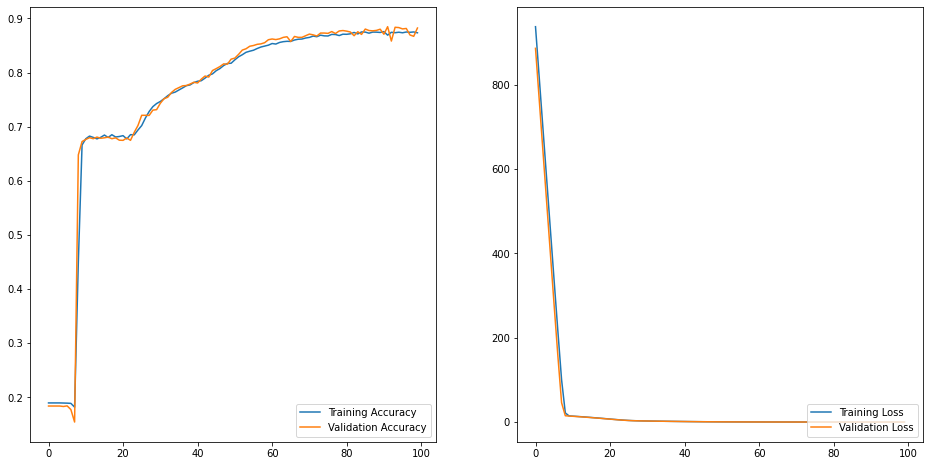

In [127]:
history_plotter(history)

We notice that the accuracy for logreg is ~86%
Now, trying out a DNN

Epoch 1/100
58/58 [==============================] - 2s 11ms/step - loss: 0.4168 - accuracy: 0.8268 - mse: 0.1298 - val_loss: 0.3422 - val_accuracy: 0.8649 - val_mse: 0.1056
Epoch 2/100
58/58 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.8696 - mse: 0.0986 - val_loss: 0.3263 - val_accuracy: 0.8705 - val_mse: 0.1003
Epoch 3/100
58/58 [==============================] - 0s 6ms/step - loss: 0.3035 - accuracy: 0.8783 - mse: 0.0926 - val_loss: 0.2861 - val_accuracy: 0.8843 - val_mse: 0.0873
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.8878 - mse: 0.0851 - val_loss: 0.2624 - val_accuracy: 0.8936 - val_mse: 0.0796
Epoch 5/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.8926 - mse: 0.0815 - val_loss: 0.2726 - val_accuracy: 0.8932 - val_mse: 0.0812
Epoch 6/100
58/58 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.8918 - mse: 0.0821 - val_loss: 0.2623 - 

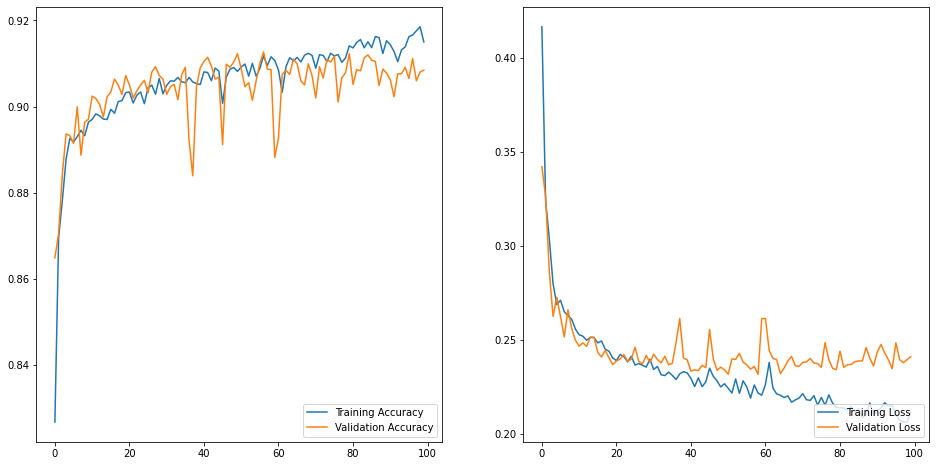

In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 2, input_shape = (16, 1), activation = 'tanh', padding = 'same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling1D(3),

    tf.keras.layers.Dense(128, activation = 'tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy', 'mse'])

history = model.fit(x = train.iloc[:, :-1],
        y = train.iloc[:, -1],
        batch_size = 256, 
        epochs = 100,
        validation_data = [val.iloc[:, :-1], val.iloc[:, -1]],
        validation_batch_size = 128)

history_plotter(history)

Accuracy touches 92% for the training set using a DNN, but there are signs of overfitting.